In [ ]:
!nvidia-smi

Wed Dec 20 09:04:52 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME=os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.0 MB/s eta 0:00:00


In [ ]:
from IPython import display
display.clear_output()

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

In [ ]:
!unzip -q "/content/SignLanguageDetection.v3i.yolov8.zip" -d /content

In [ ]:
%cd {HOME}
# Update the paths to point to the unzipped train folder
!yolo task=detect mode=train model=yolov8s.pt data=/content/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 248MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1703063182.9ef1455c9f3c.2703.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch2.jpg	   val_batch2_labels.jpg
P_curve.png					    train_batch465.jpg	   val_batch2_pred.jpg
PR_curve.png					    train_batch466.jpg	   weights
R_curve.png					    train_batch467.jpg
results.csv					    val_batch0_labels.jpg


/content


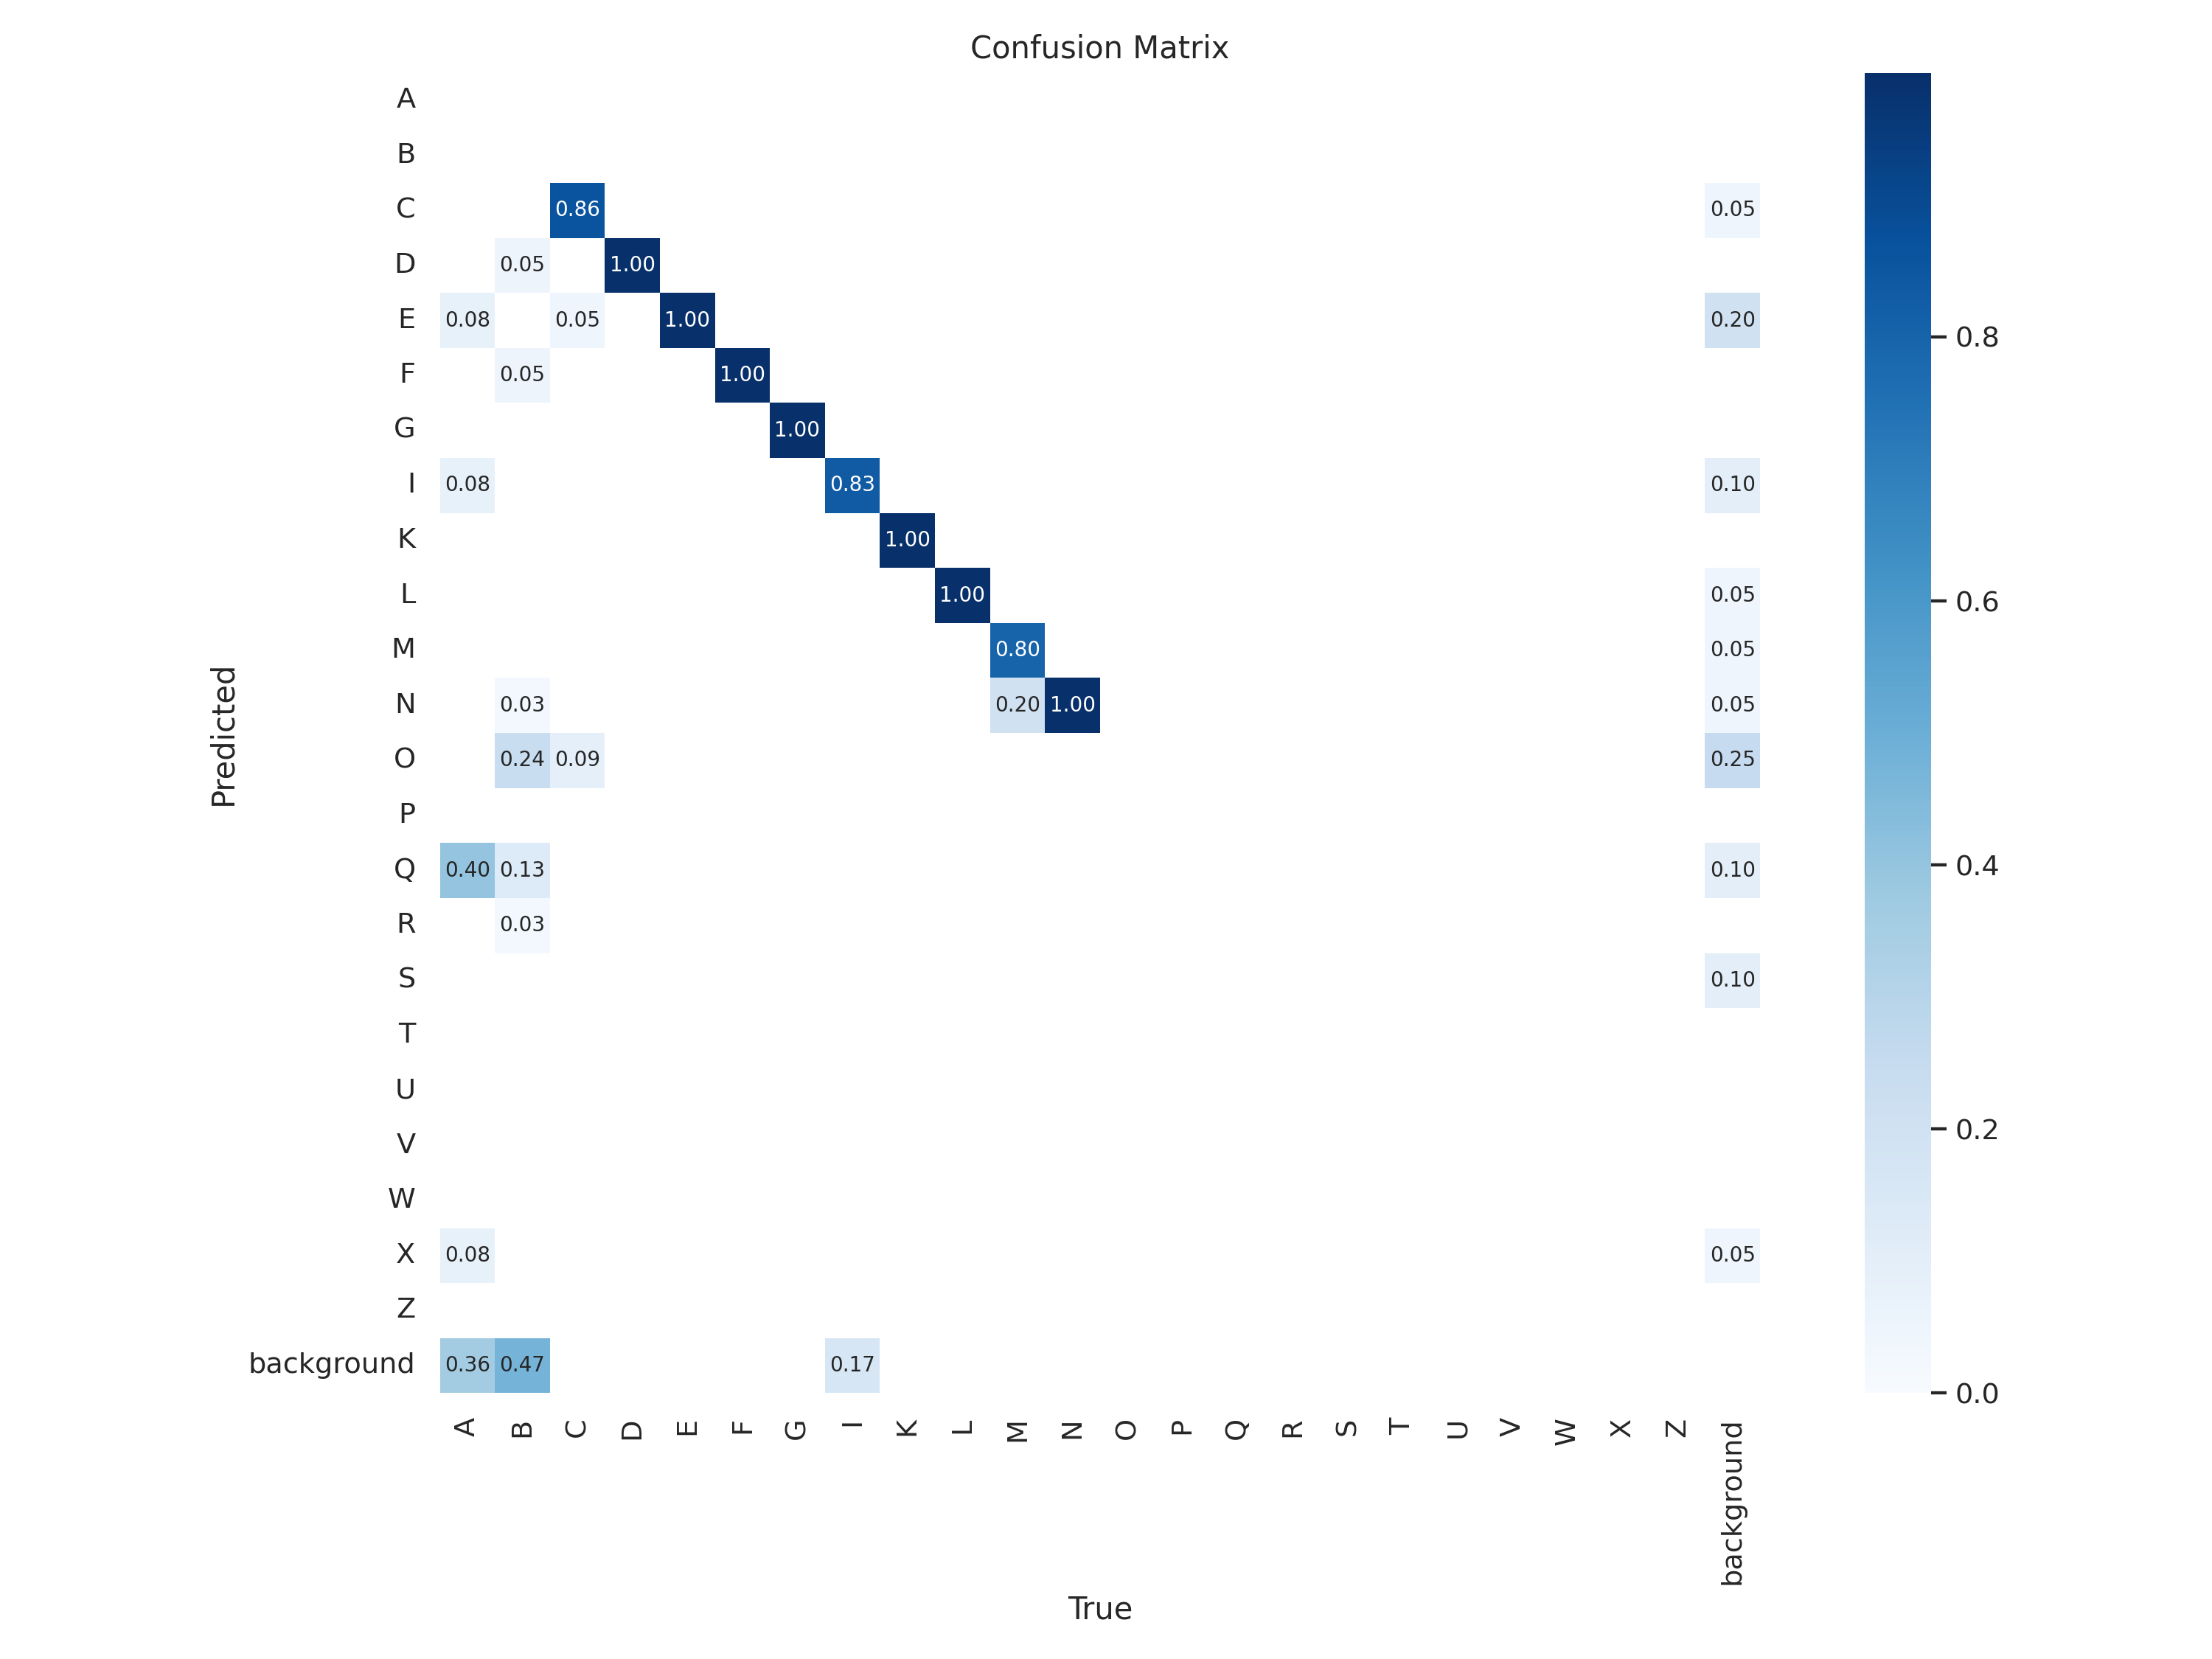

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


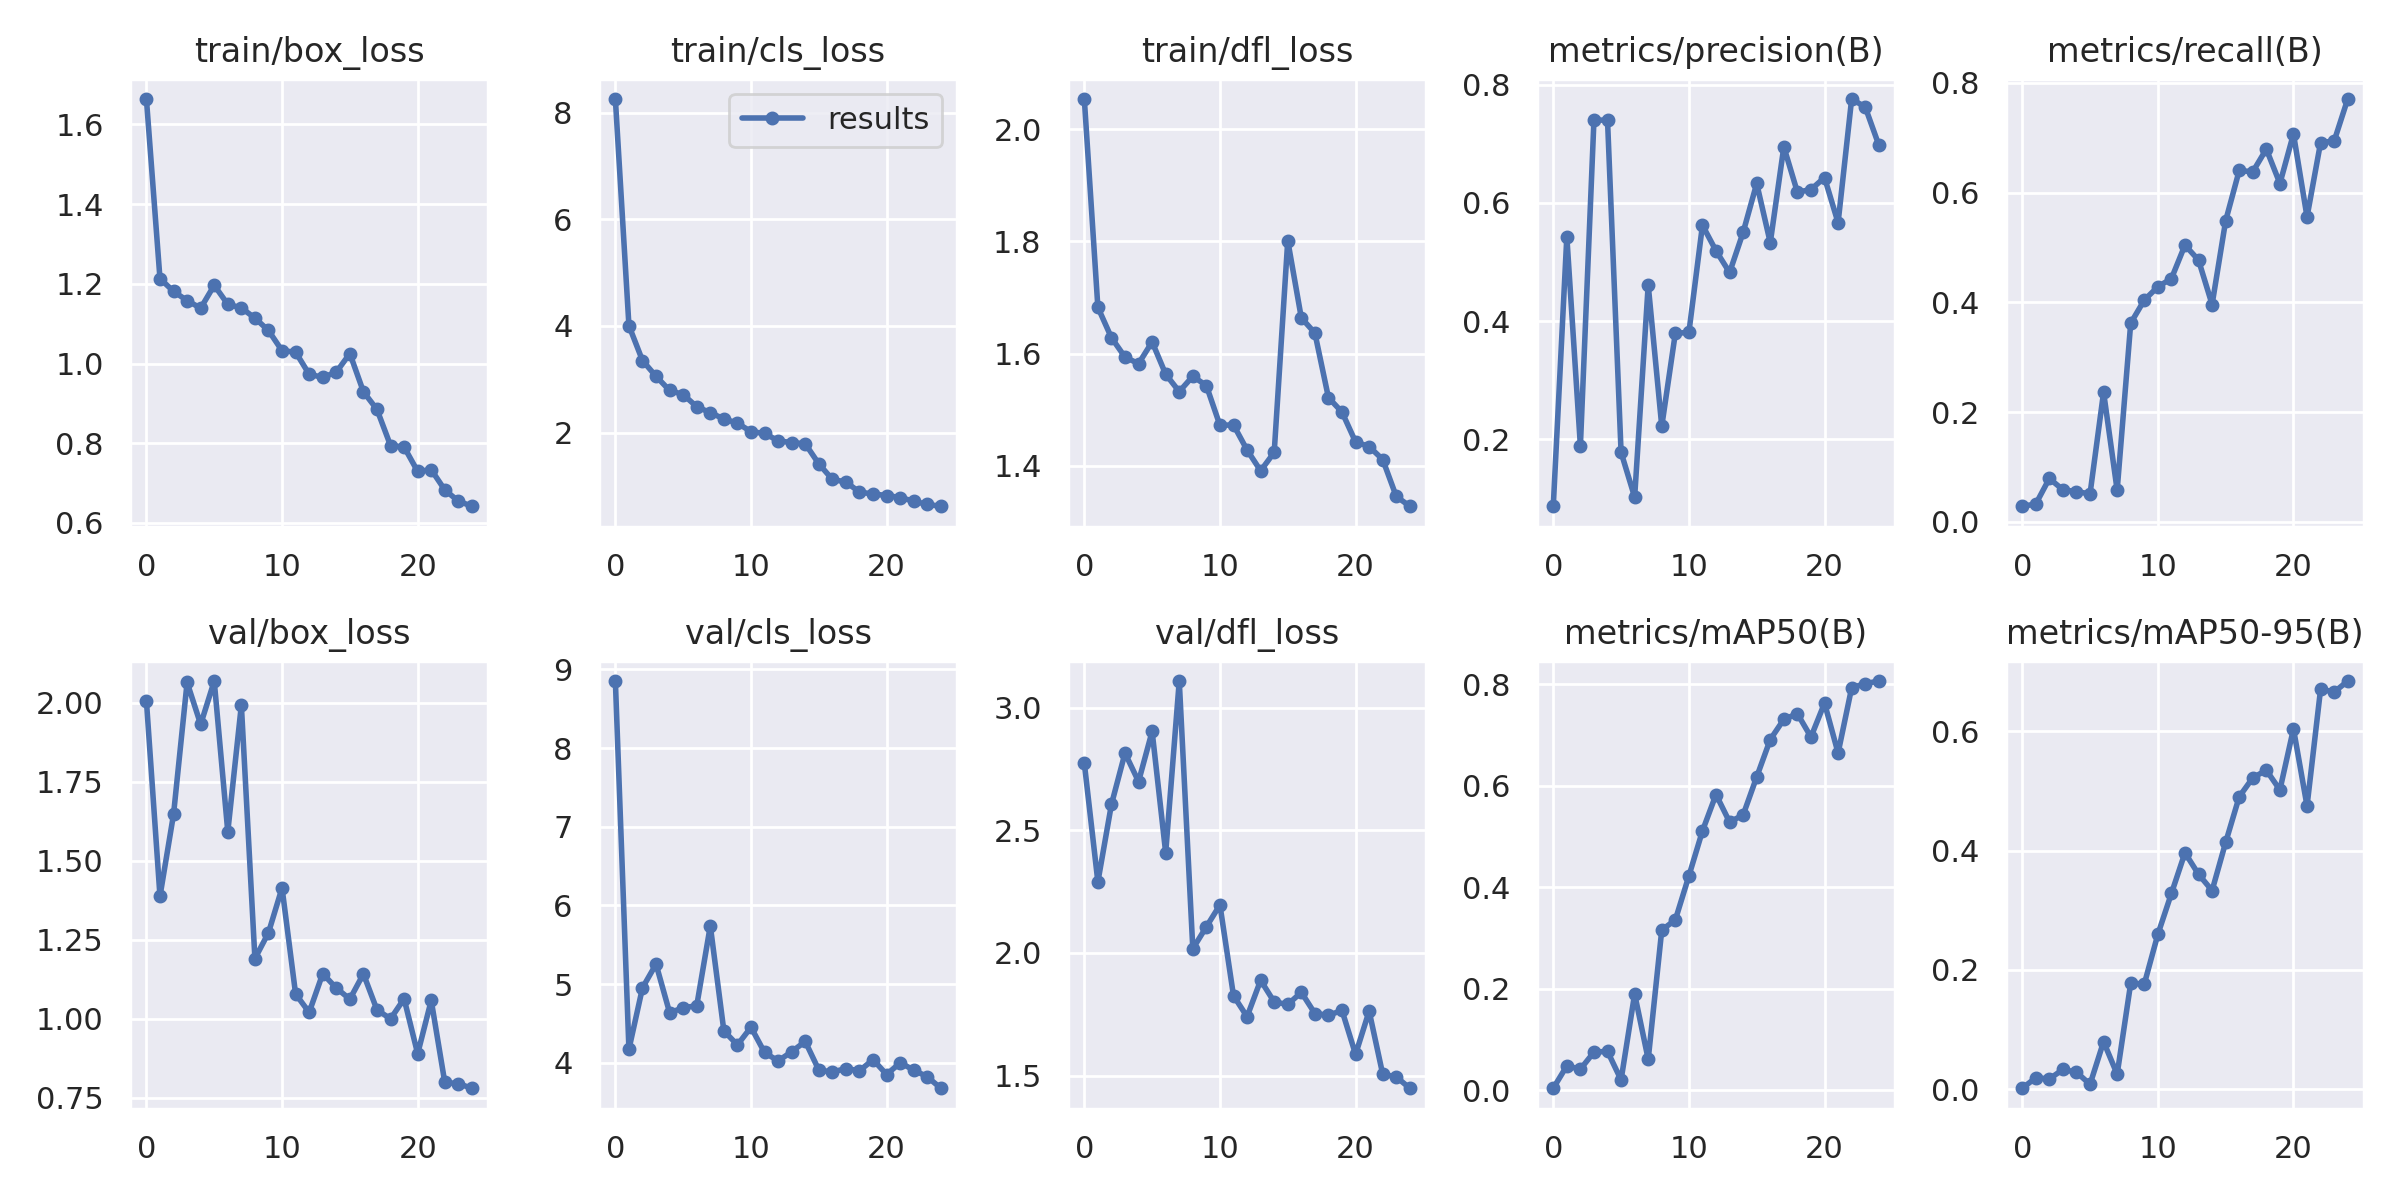

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


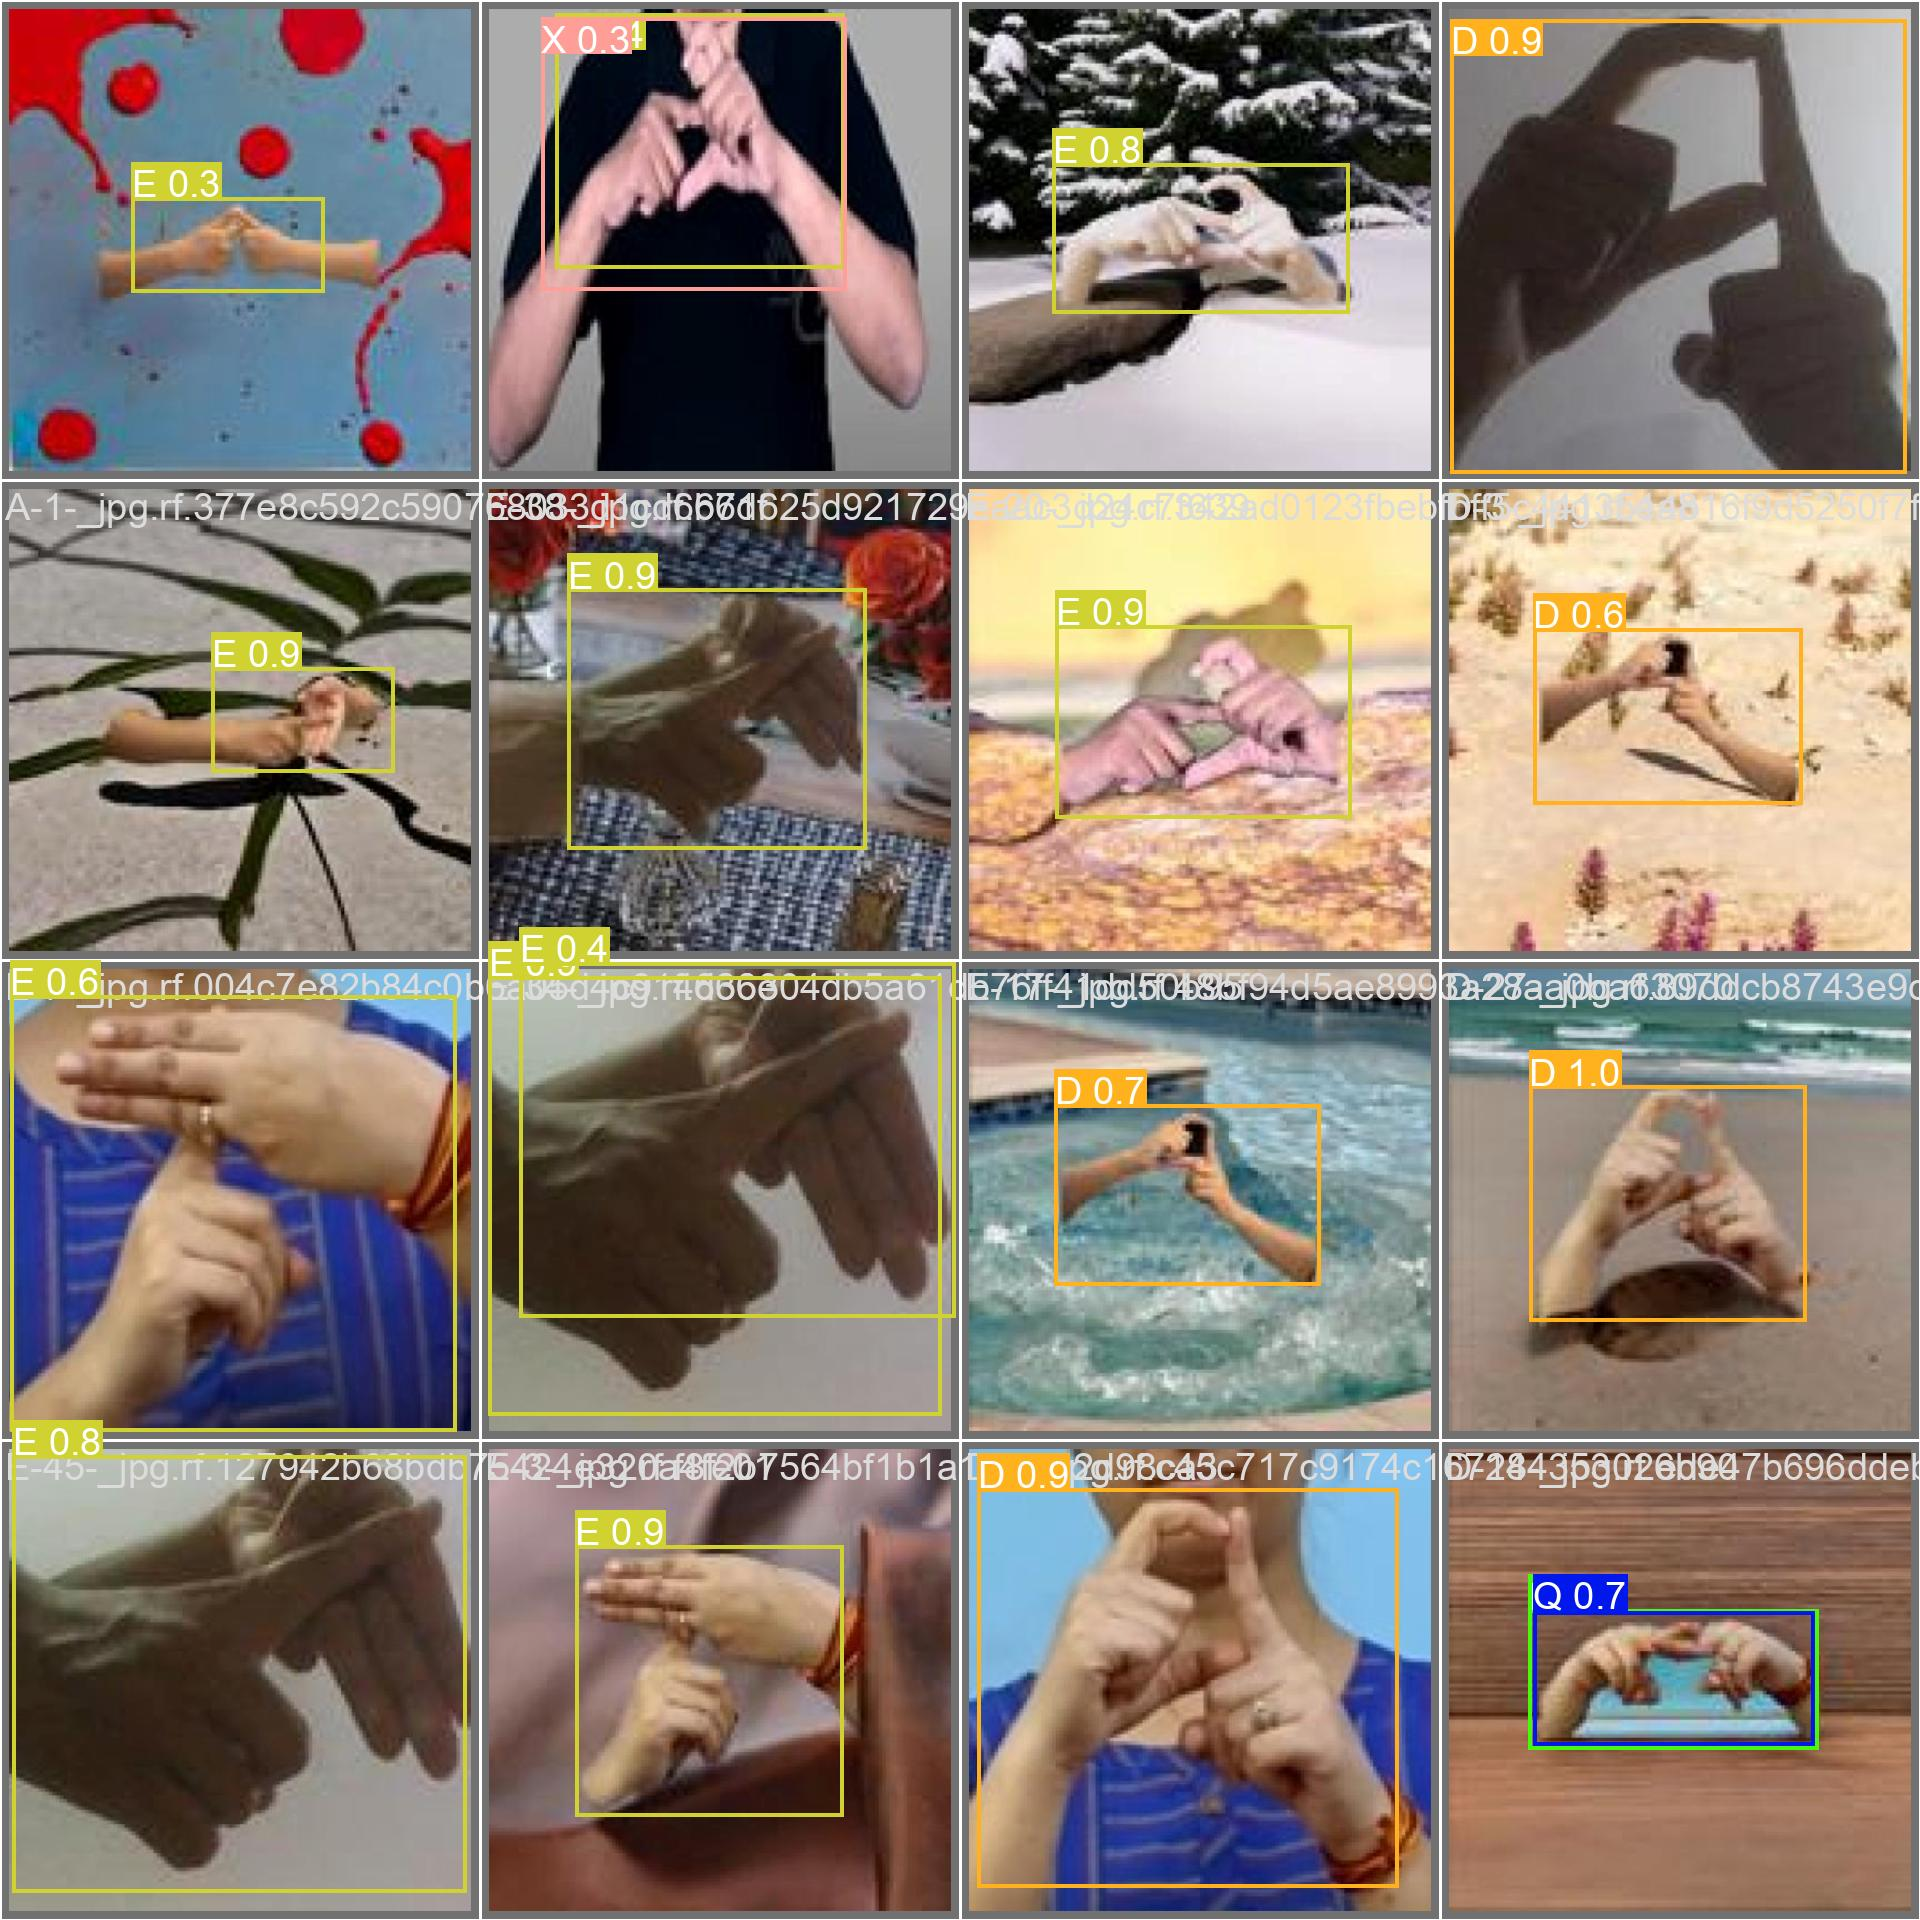

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
from math import inf
import tensorflow as tf
from sklearn.model_selection import ParameterGrid
import os

# Define hyperparameters to tune
learning_rates = [0.0001, 0.001, 0.01]

# Set up the search space
search_space = {'learning_rate': learning_rates}

# Create parameter grid
parameter_grid = ParameterGrid(search_space)

# Train and evaluate the model for each combination of hyperparameters
for parameters in parameter_grid:
    # Set hyperparameters for the model
    learning_rate = parameters['learning_rate']

    # Change directory to HOME (if HOME is a variable in your code)
    %cd {HOME}

    # Update the paths to point to the unzipped train folder
    !yolo task=detect mode=train model=yolov8s.pt data=/content/data.yaml epochs=5 lr0={learning_rate} plots=True


/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, op

In [ ]:
from math import inf
import tensorflow as tf
from sklearn.model_selection import ParameterGrid
import os

# Define hyperparameters to tune
batch_sizes = [32, 64, 128]
# Set up the search space
search_space = {'batch_size': batch_sizes,}

# Create parameter grid
parameter_grid = ParameterGrid(search_space)

# Train and evaluate the model for each combination of hyperparameters
for parameters in parameter_grid:
    # Set hyperparameters for the model
    batch_size = parameters['batch_size']

    # Change directory to HOME (if HOME is a variable in your code)
    %cd {HOME}

    # Update the paths to point to the unzipped train folder
    !yolo task=detect mode=train model=yolov8s.pt data=/content/data.yaml epochs=5 batch={batch_size} plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/data.yaml, epochs=5, patience=50, batch=32, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, op

In [ ]:
from math import inf
import tensorflow as tf
bce_loss = tf.keras.losses.BinaryCrossentropy()
from sklearn.model_selection import ParameterGrid
import os
test_loss=bce_loss
best_test_loss=float(inf)
# Define hyperparameters to tune
learning_rates = [0.0001, 0.001, 0.01]
batch_sizes = [32, 64, 128]
optimizers = ['adam', 'sgd']
epochs = [50, 100, 150]
network_architectures = ['yolov8', 'yolov8-tiny']
activation_functions = ['relu', 'leaky_relu']
data_augmentation = [True, False]

# Set up the search space
search_space = {'learning_rate': learning_rates,
                'batch_size': batch_sizes,
                'optimizer': optimizers,
                'epochs': epochs,
                'network_architecture': network_architectures,
                'activation_function': activation_functions,
                'data_augmentation': data_augmentation}

# Create parameter grid
parameter_grid = ParameterGrid(search_space)

# Train and evaluate the model for each combination of hyperparameters
for parameters in parameter_grid:
    # Set hyperparameters for the model
    learning_rate = parameters['learning_rate']
    batch_size = parameters['batch_size']
    optimizer = parameters['optimizer']
    num_epochs = parameters['epochs']
    architecture = parameters['network_architecture']
    activation = parameters['activation_function']
    augmentation = parameters['data_augmentation']

    # Train and evaluate the model
    %cd {HOME}
# Update the paths to point to the unzipped train folder
    !yolo task=detect mode=train model=yolov8s.pt data=/content/data.yaml epochs=25 imgsz=800 plots=True

if test_loss < best_test_loss:
        best_test_loss = test_loss

[Errno 2] No such file or directory: '{HOME}'
/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False